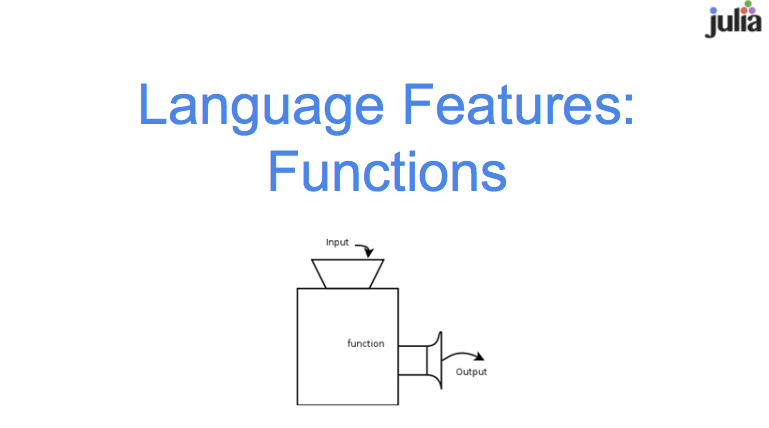

In [30]:
using FileIO   # Let's us load some figures into cells
img = load("juliaTalk_functions_fig.png")

# Functions

### Stylistic Conventions: 
Names of **functions** and **macros** are in lowercase and generally without underscores. 
* functions are 
    * lowercase (`maximum()`, `convert()`) and, 
    * when readable, with multiple words squashed together (`isequal()`, `haskey()`). 
    * when necessary, use underscores as word separators or 
        * to indicate combination of concepts (`remotecall_fetch()` vs  `fetch(remotecall(...)))` 
        * or as as modifiers (`sum_kbn()`).

    * concise but avoid abbreviation (`indexin()` rather than `indxin()`)

## How to Declare a Function

### Explicit function declaration

In [1]:
function sayhi(name)
    println("Hi $name")
end   

function f(x)
    x^2
end

f (generic function with 1 method)

In [2]:
sayhi("lance")  #call function with input parameter

Hi lance


## Functions Take Advantage of Duck-typing in Julia

"If it quacks like a duck, it's a duck"

Julia functions will work on whatever inputs make sense

https://en.wikipedia.org/wiki/Duck_typing

```
In a computer programming it is an application of the duck test -- "If it walks like a duck and quacks like a duck, then it must be a duck

Duck typing is a style of dynamic typing in which an object's current set of methods and properties determines the valid semantics, rather than its inheritance from a particular class or implementation of a specific interface.

It's a try-before-you-buy type system.

```



In [3]:
# Just want to show function is independent of the input
sayhi(23455)

Hi 23455


In [4]:
f(42)

1764

In [6]:
# Another example of input independence but need to be aware of operations!
v = rand(3)
display(v)
f(v) # Need v to be a square array not a vector! [3x1 * 3x1 is not allowed.] We will see how to mulitply elementwise

3-element Array{Float64,1}:
 0.284642
 0.642601
 0.507012

LoadError: [91mDimensionMismatch("Cannot multiply two vectors")[39m

### Declaring function via single line -- useful for small, quick functions


In [7]:
sayhi2(name) = println("Hi $name this is the one line version")

f2(x) = x^2

f2 (generic function with 1 method)

In [8]:
sayhi2("jim")

Hi jim this is the one line version


In [9]:
# notice I did a trick I did not define 
# the type of x so it returned float here Julia
# See Multi Dispatch later.
f2(2.2) 


4.840000000000001

#### Explicit Return Statement

In [10]:
#notice we have used implicit return
#an explicit return statment will end the function 

function forcereturn(x,y)
    return x*y
    x+y
end

forcereturn (generic function with 1 method)

In [11]:
forcereturn(2,3)

6

#### Return multiple values

In [12]:
function multvalues(x,y)
    x+y,x*y
end

multvalues (generic function with 1 method)

In [13]:
multvalues(2,3) # returns a tuple of values

(5, 6)

In [14]:
x,y = multvalues(2,3)

(5, 6)

### Anonymous function declarations also called lambda functions

In [15]:
sayhi3 = name  -> println("Hi $name - using anoymous functions")
f3 = x -> x^2

(::#3) (generic function with 1 method)

In [16]:
sayhi3("Chewbacca")

Hi Chewbacca - using anoymous functions


In [17]:
f3(25)

625

### Operators as Functions
In  a `+` b or a `-` b, `+` and `-` are operators

These operators can work as functions in Julia

`+`(2,3)

In [18]:
+(2,3)

5

In [19]:
*(5,6)

30

In [20]:
a = +  #Example of First class object 
a(2,3)

5

### Functions as First Class Objects

Functions in Julia are `first-class objects`: they can be assigned to variables and called using standard function call syntax from they variable they have been assigned to. 

ref: https://www.computerhope.com/jargon/f/firstclass-object.htm
```
In computer programming, a first-class object, also known as a first-class citizen or a first-class value, is a language entity — a number, a function, or a variable, for instance — that can be operated on in the same way as any other entity in the language.

For example, in the C programming language, you cannot pass a function to another function as a parameter, so in C, functions are referred to as "second-class objects." In JavaScript, however, a function can be passed to another function as a parameter just like any other value, therefore in JavaScript, functions are first-class.```

In [21]:
function xyz(a,b)
    a+b
end

xyz (generic function with 1 method)

In [22]:
pen = xyz  #<-------- see assign the function to variable pen
pen(2,3)

5

#### Extending the Idea of First Class Objects Let's look at the Map function
Anonymous function used as argument to another function

In [ ]:
map(x->x^2, [1,2,3]) # x^2 is anonymous function inside the map function


### Functions with Optional Arguments

In [23]:
# First function with optional arguments
function optionalarguments(x,y = 42)  # y =42 is a default value for y
    x +y
end

optionalarguments (generic function with 2 methods)

In [24]:
optionalarguments(0,2000) # y specified result in 2000

2000

In [25]:
optionalarguments(0) # result is 42

42

In [26]:
# First function with keyword arguments
function keywordarguments(x;y = 7)  # y =7 is a default value for y
    x +y
end

keywordarguments (generic function with 1 method)

In [27]:
keywordarguments(4,y=100) # results in 100

104

In [28]:
keywordarguments(0)  #results in 7

7

## Mutating or In-place functions - function_name!(arguments)

Produce change in their arguments after the function is called, and do not just return a value

Use **exclamation point** - `!` before argments

In [1]:
vector1 = [3, 5, 2]

3-element Array{Int64,1}:
 3
 5
 2

In [2]:
sort(vector1)

3-element Array{Int64,1}:
 2
 3
 5

In [3]:
vector1  # See not change to vector 1

3-element Array{Int64,1}:
 3
 5
 2

In [5]:
sort!(vector1)

3-element Array{Int64,1}:
 2
 3
 5

In [7]:
vector1 # Proof that sort! converted the vector in place

3-element Array{Int64,1}:
 2
 3
 5

## Broadcasting

By placing a `.` between any function name and its argument list, we tell that function to broadcast over the elements of the input objects

Let's look at the difference in behavior between `squarematrices( )` and `squarematrices .( )`

First we'll define a new matrix A that will make the difference easier to illustrate.

In [8]:
#set up array comprehension
A = [i+ 3*j for j in 0:2, i in 1:3]



3×3 Array{Int64,2}:
 1  2  3
 4  5  6
 7  8  9

In [9]:
squarematrices(x) = x^2

squarematrices (generic function with 1 method)

In [10]:
squarematrices(A) #use function to square matrices A*A

3×3 Array{Int64,2}:
  30   36   42
  66   81   96
 102  126  150

In [11]:
B = squarematrices.(A) #Broadcasting multiplies each element individually 

3×3 Array{Int64,2}:
  1   4   9
 16  25  36
 49  64  81

Using Broadcasting we can go back to the vector vs array dilemma with broadcasting (squarematrices`.`()).
This means that, for a vector **v**, **squarematrices.(v)** is defined, though **squarematrices(v)** is not:

In [14]:
v = [1, 2, 3]

3-element Array{Int64,1}:
 1
 2
 3

In [24]:
squarematrices(v) # Not defined becase V*V operation is not allowed would have to do V'* V 

LoadError: [91mDimensionMismatch("Cannot multiply two vectors")[39m

In [25]:
squarematrices.(v) #Broadcasting multiplies each element individually 

3-element Array{Int64,1}:
 1
 4
 9

In [26]:
# try again
bb = [2 2 2; 3 3 3]

2×3 Array{Int64,2}:
 2  2  2
 3  3  3

In [28]:
squarematrices.(bb) ##Broadcasting multiplies each element individually 

2×3 Array{Int64,2}:
 4  4  4
 9  9  9

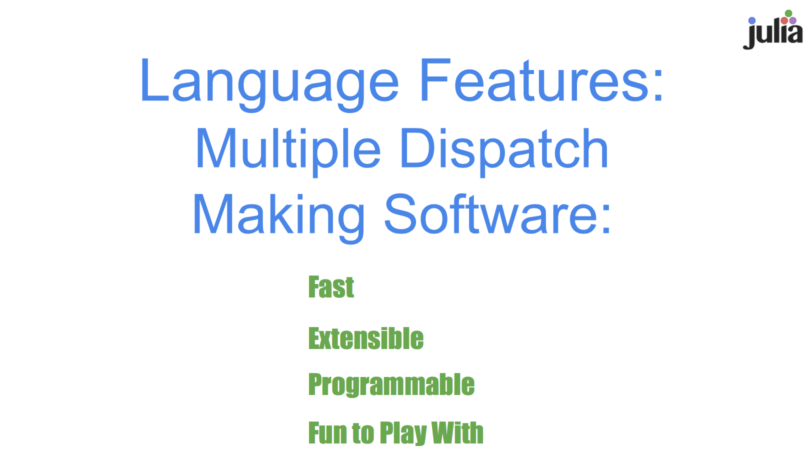

In [31]:
img = load("juliaTalk_dispatch1_fig.png")

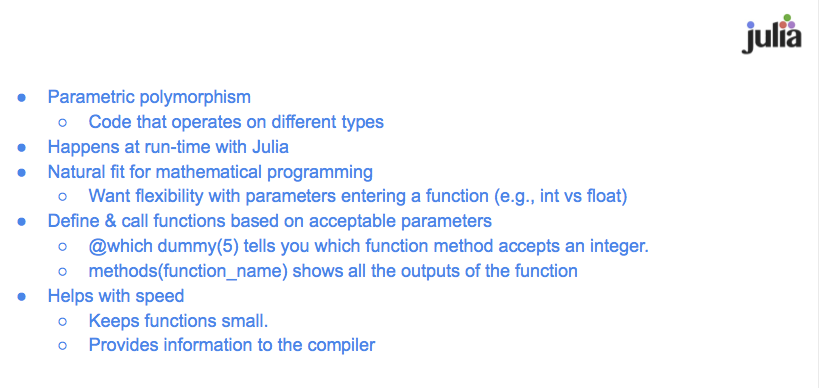

In [32]:
img = load("juliaTalk_dispatch2_fig.png")

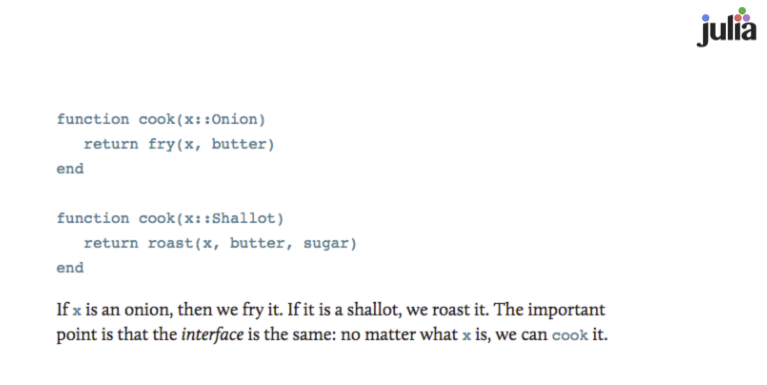

In [33]:
img = load("juliaTalk_dispatch3_fig.png")

# Multiple Dispatch Basics

#### Ways to implement different behavior for a function depending on the **number** and **type** of its  `arguments`

Functions are defined on different combinations of argument types, and applied by "dispatching" (i.e., selecting which function implementation to use at run time) to the most specific matching definition. 

`Methods` are just ways to implement different behavior for a function depending on its arguments.

In short `methods`, are just functions that take specific kinds and number of arguments.


### How it works in practice
#### Let's take a look at all of the currently defined methods/functions for `+`  (*Spoiler*: there are a lot!)

In [38]:
methods(+);

In [35]:
@which 3 + 3 # @where is a macro to learn which of the 200+ methods is used

+(x::T, y::T) where T<:Union{Int128, Int16, Int32, Int64, Int8, UInt128, UInt16, UInt32, UInt64, UInt8} in Base at int.jl:32

In [39]:
@which 3.0 + 3.0 #See it is different here

+(x::Float64, y::Float64) in Base at float.jl:375

In [40]:
@which 3.0 + 3 # Still different here too

+(x::Number, y::Number) in Base at promotion.jl:249

### We can extend existing methods using `import` versus `using`

In [ ]:
#importing allows us to mutate/change a method 
# we can't do that with `using`

# See initially "string" + "string" does not work

import Base:+
"hello " + "world!"

In [ ]:
@which "hello " + "world!"

#### making our own + method

+(x::String, y::String) = string(x,y)

[input side]               [output side]

x::String input
y::String input

In [ ]:
# + is the method name

# x::String, y::String are the inputs to the method

# string(x,y) is the new method or operation we are using when we call + with 
#          x::String, y::String inputs


+(x::String, y::String) = string(x,y) 

In [ ]:
"hello " + "world!"

In [ ]:
@which "hello " + "world!"

### Multiple Dispatch and a discussion of `Types`

"Any"  is at the top of the type hierarchy for Julia. For this example, we'll create a generic function and start specifying types that are more and more specific.

In [ ]:
f(x) = "Any"

In [ ]:
f(x::Int) = "Int"

#### We'll test the function with a few examples.

In [ ]:
f("two")  #String input  -- means use first more generic "Any" method f(x)

In [ ]:
f(2.0)   #Float64 input -- means use first more generic "Any" method f(x)

In [ ]:
f(2)   #Int64 input --- Now! It gets interesting use more specific method f(x::Int)

**Multiple Dispatch** as opposed to single dispatch, means that all of the parameter's types 
are taken into account and not just the most specific type.

We'll create two more methods for our function. These methods rely on combinations of incresingly specific types.

In [41]:
f(x::Int,y) = "Int and Any"
f(x::Int, y::AbstractString) = "Int and String"

f (generic function with 2 methods)

We'll test with a few more examples

In [42]:
f(2, sum)

"Int and Any"

In [43]:
f(2, "1")

"Int and String"

And here is a summary of our function with all of its methods

In [44]:
methods(f)

# 2 methods for generic function "f":
f(x::Int64, y::AbstractString) in Main at In[41]:2
f(x::Int64, y) in Main at In[41]:1

# Special Class of Functions : Constructors

## Constructors are functions that create new objects -- specifically, instances of `Composite Types`

It is a function that returns an object of that type. 

In [ ]:
#Basic Example using composite types
struct Powers
   fly
   strength
end

mypowers = Powers(true, false)  
#Power is a type so upper case P , 
#mypowers is a function so lowercase

In [ ]:
mypowers.fly # Use dot notation to get field fly's value

In [ ]:
mypowers.strength #Use dot notation to get field strength's value

### Outer Constructor Methods

Provide additional convenience methods for constructing objects with fewer or different types of parameters than they have fields.

Note: `outer constructor methods` can only create objects by calling other constructor methods,

In [ ]:
#Use Single function input to define original function with two inputs for field values
allpowers(x) = Powers(x,x)

In [ ]:
allpowers(true)

### Inner Constructor Methods

Provide additional convenience methods for constructing objects that
    
* enforce invariants
* allowing for construction of self-referential (recursive) objects

An inner constructor method differs from and outer constructor method in two ways

1. It is declared inside the block of a `struct` (`type` if using Juliaversion < 0.6.2) declaration, rather than outside of it like normal methods.

2. It has access to a special locally existent function called `new` that creates objects of the composite block's type.


`example borrowed from JuliaLang Documentation`

In [ ]:
struct OrderedPair
    x::Real
    y::Real
    OrderedPair(x,y) = x > y ? error("out of order") : new(x,y)
end

#Now OrderedPair objects can only be constructed such that x <= y:

In [ ]:
OrderedPair(1,2)

In [ ]:
OrderedPair(2,1)